# Visualização de Dados

Este projeto tem como objetivo desenvolver minha habilidade de visualização de dados. Para isso irei trabalhar o processo de análise exploratória de dados com o dataset de títulos disponíveis no catálogo da Netflix.

Estes dados estão disponíveis no kaggle: https://www.kaggle.com/datasets/shivamb/netflix-shows



In [229]:
# Importando as bibliotecas que serão utilizadas neste trabalho

# Manipulação de Dados
import numpy as np
import pandas as pd
import datetime as dt
import missingno
from collections import defaultdict


# Visualização de Dados
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
df.shape

(8807, 12)

In [4]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Analisando o inicio do dataset e as informações de cada coluna, é possível perceber que dentro dos dados estão contidos valores nulos e os dados não foram definidos no formato adequado no processo de importação.

In [6]:
# Verificando valores duplicados
df.duplicated().sum()

0

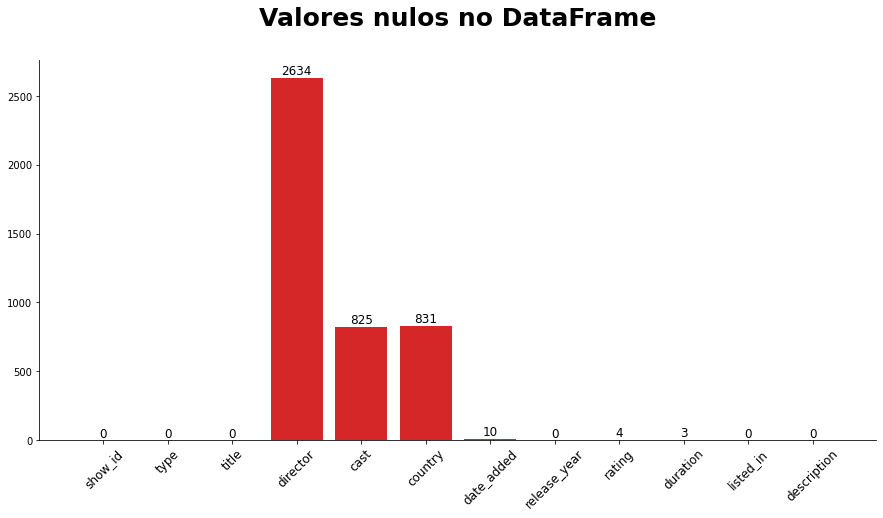

In [152]:
# Analisando os valores nulos que estão contidos no dataset.
nulos = df.isnull().sum()

fig, ax = plt.subplots(figsize = (15, 7))
ax.bar(nulos.index,nulos.values, color = 'tab:red')
for i, v in enumerate(nulos):
    ax.annotate(text = v, xy = (i,v), ha = 'center', va = 'bottom'
                ,fontsize = 12, weight='ultralight')

ax.spines[['right','top']].set_visible(False)
    
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Valores nulos no DataFrame\n", fontsize = 25, weight = 'bold')

plt.show()

Foi identificado que aproximadamente 25% das linhas possuem dados faltantes relacionados a direção da produção e 10% acerca de informações de atores e país de origem, iremos analisar as características destas produções. Em menor número poucos dados não possuem data de lançamento, nota e duração, para estes devido a baixa ocorrência poderam ser desconsiderados na análise

In [8]:
# Removendo as linhas com poucos valores nulos
df_limpo = df.dropna(axis = 0, subset = ['date_added','rating','duration'])

In [9]:
# Analisando as linhas com grande quantidade de valores nulos
df_null = df_limpo[df_limpo.isnull().any(axis = 1)].copy()
df_null.shape

(3458, 12)

Analisando se existem padrões nos dados faltantes

<Axes: >

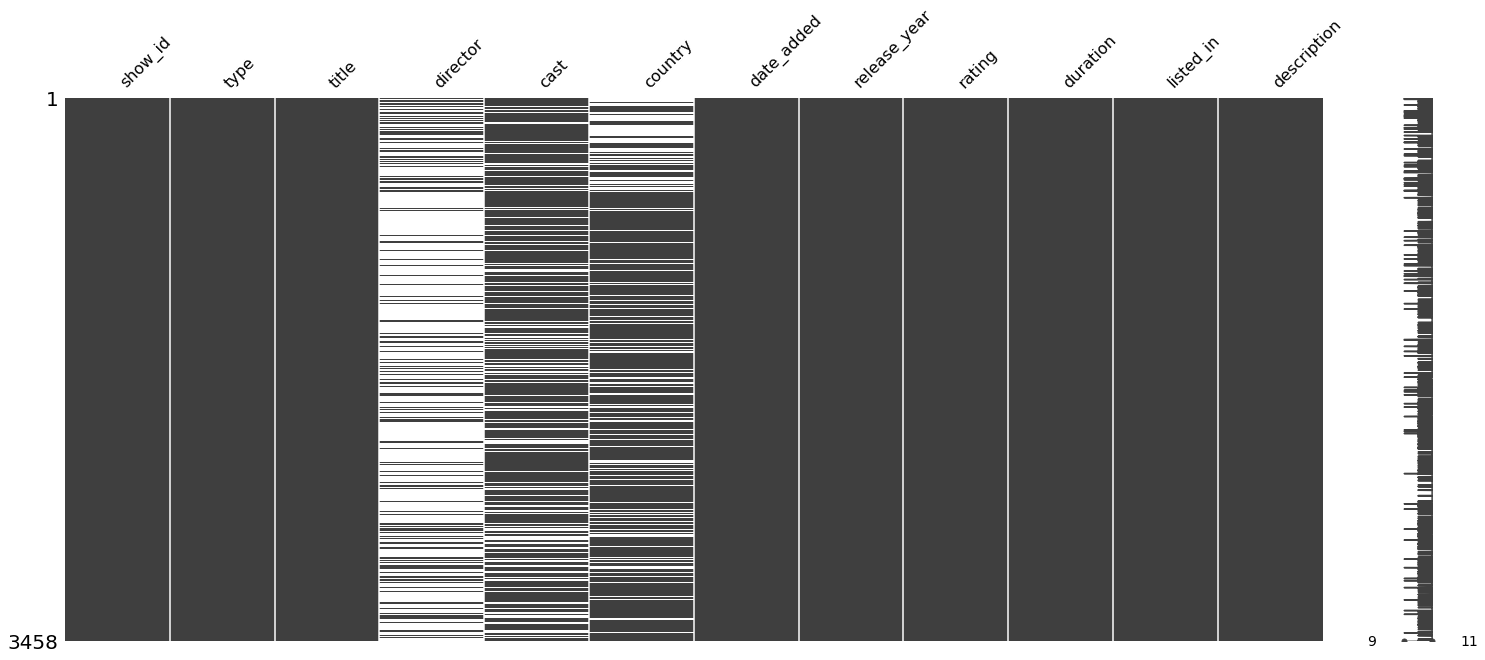

In [10]:
missingno.matrix(df_null)

Não há coincidência aparente entre os dados faltantes nas colunas **director**, **cast** e **country**

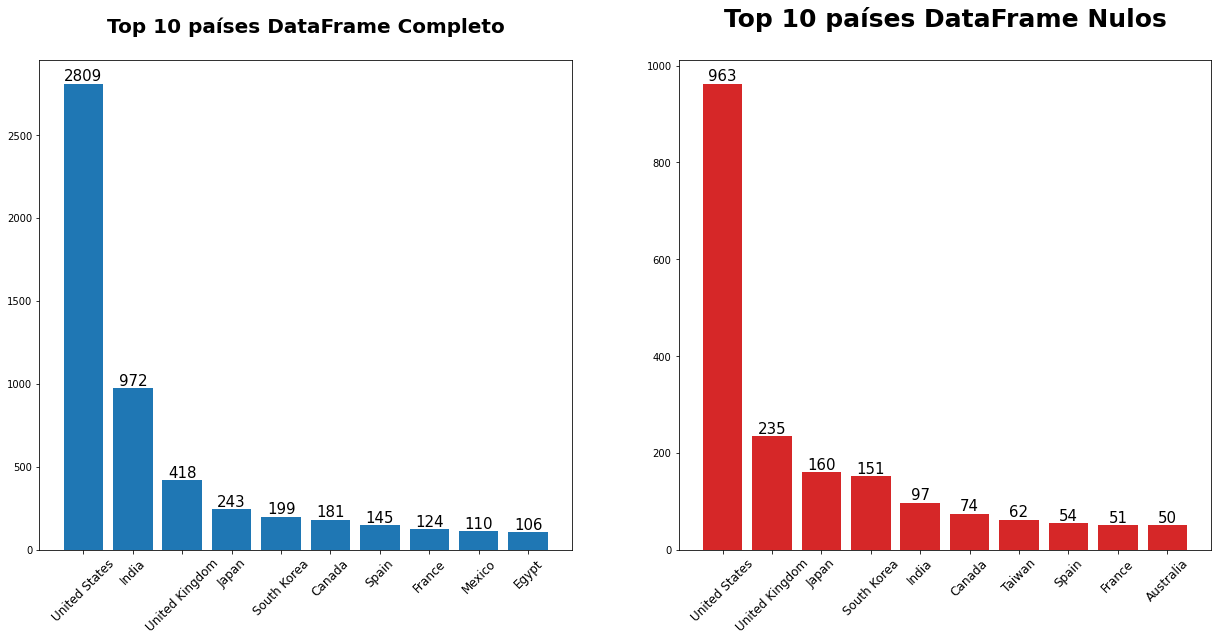

In [153]:
# Verificando se existe alguma relação entre a falta de informações e o país de origem
# Gráfico contendo a distribuição de filmes por país no dataframe completo e no dataframe com valores nulos

# DataFrame Completo
df1 = df_limpo.value_counts('country')[:10]
# DataFrame Nulos
df2 = df_null.value_counts('country')[:10]

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (21,9))

plt.subplot(121)
ax1.bar(df1.index,df1.values,color = 'tab:blue')
plt.xticks(rotation = 45, fontsize = 12)

for i, v in enumerate(df1):
    ax1.annotate(text = v, xy = (i,v), ha = 'center', va = 'bottom', fontsize = 15)

plt.title("Top 10 países DataFrame Completo\n", fontsize = 20, weight = 'bold')
    
plt.subplot(122)
ax2.bar(df2.index,df2.values, color = 'tab:red')
plt.xticks(rotation = 45, fontsize = 12)

for i, v in enumerate(df2):
    ax2.annotate(text = v, xy = (i,v), ha = 'center', va = 'bottom', fontsize = 15)

plt.title("Top 10 países DataFrame Nulos\n", fontsize = 25, weight = 'bold')

plt.show()

Através dos gráficos explicitados ainda não fica claro se existe alguma os valores nulos nos dados e o país de origem, porém alguns números se mostram interessantes, apenas 10% do total de filmes de origem indiana possuem valores nulos enquanto aproximadamente 50% dos filmes Britânicos faltam dados, a maioria dos cenários aparentam estar mais próximo do caso britânico do que indiano.

* Existe alguma diferenciação no input de dados no país de origem ? 
* Regulação diferente por parte da Netflix ? 
* Maior rigor em Copyrights ?

In [260]:
# Convertendo os valores para o formato correto e limpando o dataset
df_limpo['date_added'] = pd.to_datetime(df_limpo['date_added'],format = 'mixed')
df_limpo.drop(columns = ['show_id','description'],inplace = True)

<ipython-input-260-20b5a4f23ea4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['date_added'] = pd.to_datetime(df_limpo['date_added'],format = 'mixed')
<ipython-input-260-20b5a4f23ea4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo.drop(columns = ['show_id','description'],inplace = True)


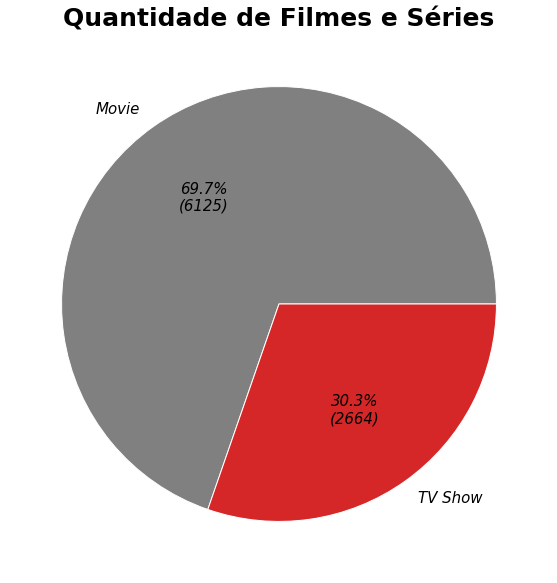

In [128]:
# Verificando a quantidade e proporção de linhas de Filmes e Séries

tvshow = df_limpo['type'].value_counts()
fig, ax = plt.subplots(figsize = (20,10))

def func(pct, allvals):
    absoluto = int(pct/100*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absoluto)

ax.pie(tvshow, labels = tvshow.index
       ,colors = ['grey','tab:red']
       ,autopct = lambda pct: func(pct,tvshow.tolist())
       ,textprops=dict(fontsize=15
                       ,weight='ultralight'
                       ,style='italic')
       ,wedgeprops={'edgecolor':'white'})


plt.title("Quantidade de Filmes e Séries", fontsize = 25,weight='bold')
plt.show()


No gráfico acima é possível perceber que no catálogo da netflix temos uma presença maior de filmes, sendo ela mais que o dobro das séries.

In [300]:
# Quais são os atores mais frequentes no catálogo da Netflix ?

# Como para cada filme temos uma lista de atores, transformaremos esta série com lista contidas em uma lista única, para apartir de então contabilizar as repetições.
elenco = df_limpo['cast'].dropna()
elenco = [i for x in elenco for i in x.split(',')]
elenco = pd.DataFrame(elenco,columns = ['Atores']).value_counts().to_frame('Aparições').reset_index()


In [ ]:


fig, ax = plt.subplots(figsize=(20,10))

ax.bar(elenco['Atores'], elenco['Aparições'])

plt.title('Top 10 Atores mais presentes no Catálogo')
plt.show()